In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [130]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

#%load_ext tensorboard
%reload_ext tensorboard

In [132]:
from sklearn.model_selection import train_test_split

# Load the preprocessed dataset
dataset = pd.read_csv("preprocessed_dataset.csv")

# Assuming you have text_messages and department_labels arrays
text_messages = dataset["Message"]
department_labels = dataset["Departement"]

# Convert department labels to numerical format
label_map = {label: index for index, label in enumerate(set(department_labels))}
numerical_labels = [label_map[label] for label in department_labels]

# Split dataset into training, validation, and test sets
train_text, temp_text, train_labels, temp_labels = train_test_split(
    text_messages, numerical_labels, test_size=0.3, random_state=42
)
val_text, test_text, val_labels, test_labels = train_test_split(
    temp_text, temp_labels, test_size=0.2, random_state=42
)

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_text, train_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((val_text, val_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_text, test_labels))

print("Train len: ", len(train_text))
print("Val len: ", len(val_text))
print("Test len: ", len(test_text))

Train len:  111
Val len:  38
Test len:  10


In [133]:
for example, label in train_dataset.take(3):
    print("text: ", example.numpy())
    print("label: ", label.numpy())

text:  b'pak kepareng matur mbok tulung pikiraken dalan wonosobo watumalang dalan kecamatan rekoso kok puluhan taun nganti pengen pindah provinsi sayang mboten saget'
label:  0
text:  b'jalan rusak parah di jalan utama jl kabupaten penghubung desa kaligowong wonosobo dengan desa pecekelan kabupaten kebumen mohon ditindaklanjuti pak sangat ingin jalan yang layak sudah hampir th lebih jalan rusak parah banget '
label:  0
text:  b'alamat kabupaten kota jakarta selatan kecamatan tebet kelurahan menteng dalam laporan asslamuallaikum pak ganjar perkenalkan nama saya vioranda raditya herkaputra ijin pak saya habis menonton cuplikan bapak terkait x jam akan ada respon apabila terjadi ketidakadilan pak ijin pak mobil saya dibawa lari oleh warga bapak di wonosobo atas nama anang sugiarto yang merupakan adik dari kepala desa sapuran wonosobo sejak tahun lalu saya mencoba melapor ke polres wonosobo tetapi tidak ada respon pak sudah beberapa kali bolak balik polres tapi terkesan tidak ada hasil seh

2024-04-09 00:39:33.225676: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled


In [134]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = (
    train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
)
val_dataset = val_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [135]:
for example, label in train_dataset.take(1):
    print("texts: ", example.numpy()[:3])
    print()
    print("labels: ", label.numpy()[:3])

texts:  [b'nten info pak ganjarpranowo jarene mpun thn kondisi bgitu tpatnya kab wonosobo kec kaliwiro mhon di anu pak matur nuwun '
 b'assalamualaikum selamat malam bapak ganjar saya mau mengadu sekaligus melapor saya tinggal di wonosobo tepatnya di jaraksari laporan saya mengenai virus covid di wonosobo saya minta tolong sama bapak di wonosobo kususnya diberi peraturan yg sangat tegas jngn cuma tegas mengenai kasus covid di wonosobo lockdown semua swalayan dan toko di wonosobo beri sanksi tegas bagi pelanggar semakin hari penderita covid semakin bertambah swalayn toko besar semakin ramai jika tidak ada tindakan khusus kasus covid di wonosobo akan semakin meningkat terimaksih'
 b'assamu alaikum pak gubernur ganjar pranowo yg terhormat pak ijin bertanya kenapa biaya perpanjang sim c di kab wonosobo adalah sebesar rp ya padahal tarif perpanjangan sim sudah tertera pada peraturan pemerintah nomor tahun yaitu untuk sim c atau pengguna sepeda motor akan dikenakan biaya rp ditambahan cek ke

In [136]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [137]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'saya', 'di', 'pak', 'dan', 'wonosobo', 'ada',
       'jalan', 'yg', 'tidak', 'yang', 'mohon', 'untuk', 'sudah', 'ke',
       'ini', 'dari', 'karena', 'biaya'], dtype='<U15')

In [138]:
encoded_example = encoder(example)[:3].numpy()
encoded_example

array([[  1, 343,   4, 486,   1,   1, 535, 221, 805, 902, 127,   6, 181,
        184,   1,   3,   1,   4, 215, 257,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [139]:
for n in range(3):
    print("Original: ", example[n].numpy())
    print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
    print()

Original:  b'nten info pak ganjarpranowo jarene mpun thn kondisi bgitu tpatnya kab wonosobo kec kaliwiro mhon di anu pak matur nuwun '
Round-trip:  [UNK] info pak ganjarpranowo [UNK] [UNK] thn kondisi bgitu tpatnya kab wonosobo kec kaliwiro [UNK] di [UNK] pak matur nuwun                                                                                                                                                                                                   

Original:  b'assalamualaikum selamat malam bapak ganjar saya mau mengadu sekaligus melapor saya tinggal di wonosobo tepatnya di jaraksari laporan saya mengenai virus covid di wonosobo saya minta tolong sama bapak di wonosobo kususnya diberi peraturan yg sangat tegas jngn cuma tegas mengenai kasus covid di wonosobo lockdown semua swalayan dan toko di wonosobo beri sanksi tegas bagi pelanggar semakin hari penderita covid semakin bertambah swalayn toko besar semakin ramai jika tidak ada tindakan khusus kasus covid di wonosobo aka

In [140]:
total_train_samples = len(train_text)
total_val_samples = len(val_text)

# Calculate the number of epochs
# Assuming each epoch goes through the entire training dataset
num_epochs = 10

# Calculate steps per epoch
# Steps per epoch should be total_train_samples divided by batch size
steps_per_epoch = total_train_samples // BATCH_SIZE

# Calculate validation steps
# Validation steps should be total_val_samples divided by batch size
validation_steps = total_val_samples // BATCH_SIZE

print("Train len: ", len(train_text))
print("Val len: ", len(val_text))
print("Test len: ", len(test_text))
print("Steps per epoch:", steps_per_epoch)
print("Validation steps:", validation_steps)

Train len:  111
Val len:  38
Test len:  10
Steps per epoch: 1
Validation steps: 0


In [141]:
model = tf.keras.Sequential(
    [
        encoder,
        tf.keras.layers.Embedding(
            input_dim=len(encoder.get_vocabulary()),
            output_dim=64,
            # Use masking to handle the variable sequence lengths
            mask_zero=True,
        ),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(len(label_map), activation="softmax"),
    ]
)

In [142]:
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"]
)

history = model.fit(
    train_dataset,
    epochs=15,
    validation_data=val_dataset,
    # validation_steps=1
)

Epoch 1/15
2/2 [==============================] - 43s 15s/step - loss: 1.0938 - accuracy: 0.4775 - val_loss: 1.0784 - val_accuracy: 0.6316
Epoch 2/15
2/2 [==============================] - 3s 2s/step - loss: 1.0799 - accuracy: 0.4955 - val_loss: 1.0591 - val_accuracy: 0.6316
Epoch 3/15
2/2 [==============================] - 5s 3s/step - loss: 1.0637 - accuracy: 0.4955 - val_loss: 1.0341 - val_accuracy: 0.6316
Epoch 4/15
2/2 [==============================] - 4s 1s/step - loss: 1.0431 - accuracy: 0.4955 - val_loss: 0.9995 - val_accuracy: 0.6316
Epoch 5/15
2/2 [==============================] - 4s 1s/step - loss: 1.0141 - accuracy: 0.4955 - val_loss: 0.9559 - val_accuracy: 0.6316
Epoch 6/15
2/2 [==============================] - 4s 2s/step - loss: 0.9815 - accuracy: 0.4955 - val_loss: 0.9217 - val_accuracy: 0.6316
Epoch 7/15
2/2 [==============================] - 4s 1s/step - loss: 0.9550 - accuracy: 0.4955 - val_loss: 0.9059 - val_accuracy: 0.6316
Epoch 8/15
2/2 [=======================

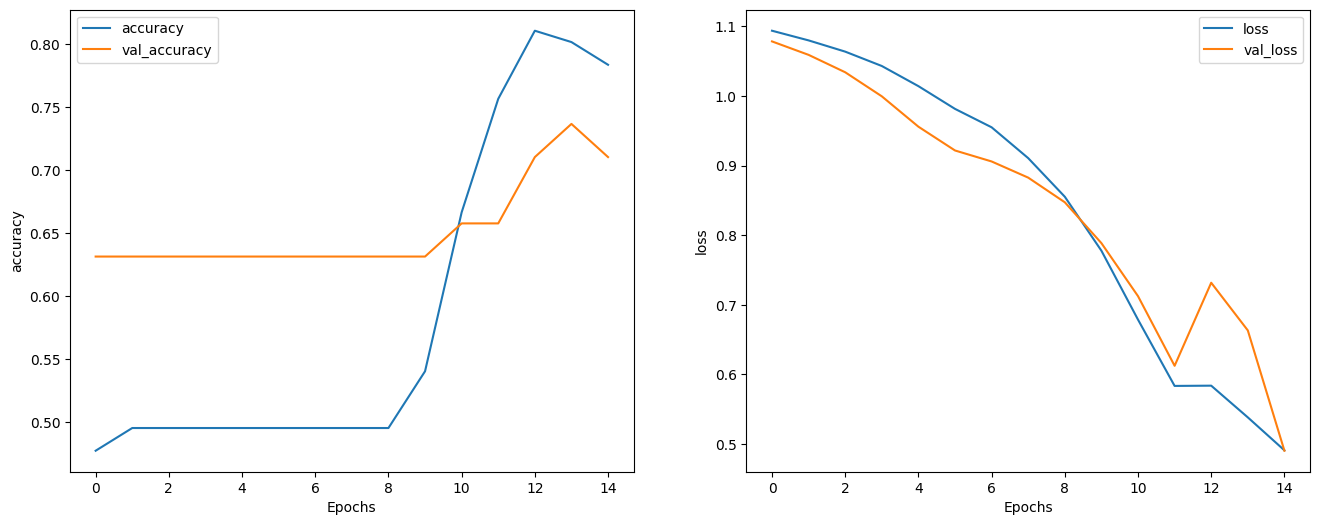

In [143]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history["val_" + metric], "")
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, "val_" + metric])


plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, "accuracy")
plt.subplot(1, 2, 2)
plot_graphs(history, "loss")

In [144]:
test_loss, test_acc = model.evaluate(test_dataset)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

1/1 [==============================] - 0s 70ms/step - loss: 0.5136 - accuracy: 0.8000
Test Loss: 0.5135908126831055
Test Accuracy: 0.800000011920929


In [145]:
# Retrieve a batch of text messages and labels from the test set
text_batch, label_batch = next(iter(test_dataset))

# Predict labels for the text batch
predictions = model.predict_on_batch(text_batch)

# Apply softmax to convert logits to probabilities
predictions_prob = tf.nn.softmax(predictions)

# Get the predicted class indices
predicted_class_indices = tf.argmax(predictions_prob, axis=1).numpy()

# Get the class probabilities
probabilities = predictions_prob.numpy()

# Define class names if available (replace with your actual class names)
class_names = [
    "dinas pekerjaan umum",
    "kepolisian daerah jawa tengah",
    "dinas kesehatan",
]  # Add your class names here

# Print the results for each text message
for i in range(len(text_batch)):
    print(f"Text: {text_batch[i].numpy().decode('utf-8')}")
    print(
        "True Label:", label_batch[i].numpy() + 1
    )  # Add 1 to match index with class label
    print("Predicted Label:", predicted_class_indices[i] + 1)
    print("Class Probabilities:")
    for j in range(len(probabilities[i])):
        print(f"{probabilities[i][j]} {class_names[j]}")
    print()

Text: perempatan kretek wonosobo macet terus pak ganjar pranowo ada pos polisi tapi g ada yg jaga mohon solusinya
True Label: 2
Predicted Label: 1
Class Probabilities:
0.46233490109443665 dinas pekerjaan umum
0.27075985074043274 kepolisian daerah jawa tengah
0.2669052481651306 dinas kesehatan

Text: jalan rusak parah yang menuju desa kepyar gumiwang tolong diperbaiki kasihan ibu hamil kendaraan yang melintas maaf saya ga bisa kirim gambar karna saya dijakarta
True Label: 1
Predicted Label: 1
Class Probabilities:
0.5666748285293579 dinas pekerjaan umum
0.2172018140554428 kepolisian daerah jawa tengah
0.21612337231636047 dinas kesehatan

Text: jalan provinsi yg menghuhungkan parakan wonosobo yg sudah bulan macet km setiap sore hari karena jembatan rusak tidak ada perbaikan coba dikunjungi pak ganjar pranowo
True Label: 1
Predicted Label: 1
Class Probabilities:
0.5761000514030457 dinas pekerjaan umum
0.2119508534669876 kepolisian daerah jawa tengah
0.21194913983345032 dinas kesehatan

Tex

In [146]:
sample_text = (
    "Text: bpkb motor saya hilang mau ngurus di polres wonosobo saya tanya biayanya sekitar apakah benar "
)
predictions = model.predict(np.array([sample_text]))
print(predictions)
# print(label_map)

# Get the predicted label with the highest probability
predicted_label_index = np.argmax(predictions)

print("Probability:", predictions[0][predicted_label_index])


# Function to get the key from a given value
def get_key_from_value(dictionary, value):
    for key, val in dictionary.items():
        if val == value:
            return key
    return None  # If value is not found in the dictionary


# Example usage
value_to_find = np.argmax(predictions)
key_for_value = get_key_from_value(label_map, value_to_find)
if key_for_value is not None:
    print("Numeric label", value_to_find, "is:", key_for_value)
else:
    print("Value", value_to_find, "not found in the dictionary.")

[[0.2112273  0.43140593 0.35736674]]
Probability: 0.43140593
Numeric label 1 is: kepolisian daerah jawa tengah


In [147]:
print(label_map)

{'dinas pekerjaan umum bina marga cipta karya': 0, 'kepolisian daerah jawa tengah': 1, 'dinas kesehatan': 2}


In [160]:
# Assuming you have a TextVectorization layer named 'encoder' and a model defined

# Set up a logs directory, so Tensorboard knows where to look for files.
log_dir = "/home/abdan/Desktop/Skripsi/[KODE] Tensorflow RNN/logs"
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

# Save Labels separately on a line-by-line manner.
with open(os.path.join(log_dir, "metadata.tsv"), "w") as f:
    # Get the vocabulary from the TextVectorization layer
    vocabulary = encoder.get_vocabulary()
    for word in vocabulary:
        f.write("{}\n".format(word))

# Save the weights of the Embedding layer
embedding_weights = model.layers[1].get_weights()[0]  # Assuming the Embedding layer is the second layer in your model
embedding_variable = tf.Variable(embedding_weights, name='embedding')
# Create a checkpoint from embedding
checkpoint = tf.train.Checkpoint(embedding=embedding_variable)
checkpoint.save(os.path.join(log_dir, "embedding.ckpt"))


# Set up config.
config = projector.ProjectorConfig()
embedding = config.embeddings.add()
# The name of the tensor will be suffixed by `/.ATTRIBUTES/VARIABLE_VALUE`.
embedding.tensor_name = "embedding/.ATTRIBUTES/VARIABLE_VALUE"
embedding.metadata_path = "metadata.tsv"  # Update to just "metadata.tsv"
projector.visualize_embeddings(log_dir, config)


In [161]:
# Now run tensorboard against on log data we just saved.
%tensorboard --logdir "/logs" --port 6006
notebook.display(port=6006, height=500)

Reusing TensorBoard on port 6006 (pid 98557), started 0:02:59 ago. (Use '!kill 98557' to kill it.)

Selecting TensorBoard with logdir /logs (started 0:02:59 ago; port 6006, pid 98557).


In [162]:
from tensorboard import notebook
!pwd
# Get a list of active TensorBoard instances
tb_list = notebook.list()


/home/abdan/Desktop/Skripsi/[KODE] Tensorflow RNN
Known TensorBoard instances:
  - port 6006: logdir /logs (started 0:03:22 ago; pid 98557)
